<a href="https://colab.research.google.com/github/jclee0109/deep_learning_self_study/blob/main/3_1_k_%EC%B5%9C%EA%B7%BC%EC%A0%91_%EC%9D%B4%EC%9B%83_%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
"""
# k-최근접 이웃 회귀
"""

"""
## 데이터 준비
"""
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

Text(0, 0.5, 'perch_weight')

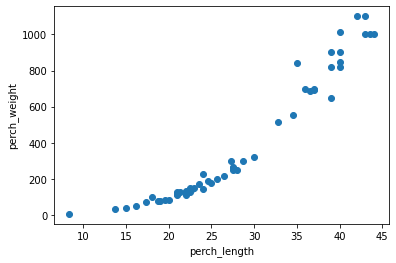

In [28]:
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel("perch_length")
plt.ylabel("perch_weight")

In [29]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
print(train_input.shape, test_input.shape)
print(train_target.shape, test_target.shape)

(42,) (14,)
(42,) (14,)


In [30]:
# reshape을 안한채로 그냥 넣으면 아래 knr.fit()에서 에러가 남!
# 아직 까지는 추정이지만, 여러 feature들에 대한 target을 하나로 뽑아야하기 때문에, 한 row를 리스트로 꼭 정의해줘야 하는 것 같음
"""
input(features)     target
[                   [
  [...],              1,
  [...],              0,
  [...],              2,
...                 ...
]                   ]
"""
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [31]:
"""
## 결정계수 (R^2)
"""
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()

knr.fit(train_input, train_target)
knr.score(test_input, test_target) # R^2 

0.992809406101064

In [32]:
from sklearn.metrics import mean_absolute_error

test_predict = knr.predict(test_input)

mae = mean_absolute_error(test_predict, test_target)
print(mae)

19.157142857142862


In [33]:
from sklearn.metrics import mean_squared_error

test_predict = knr.predict(test_input)

mse = mean_squared_error(test_predict, test_target)
print(mse)

721.7385714285714


In [34]:
print(knr.score(test_input, test_target))

0.992809406101064


In [35]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [41]:
# score train이 더 작게 나왔다는 것은 과소적합이 되었다는 것 -> 모델이 조금 더 복잡해도 된다! -> knn에서는 kneighbors를 줄이면 조금 더 세부적인 특징에 주목하게 되어 train이 올라갈거야
knr = KNeighborsRegressor()
knr.n_neighbors = 3

print(train_target)

knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

[  85.  135.   78.   70.  700.  180.  850.  820. 1000.  120.   85.  130.
  225.  260. 1100.  900.  145.  115.  265. 1015.  514.  218.  685.   32.
  145.   40.  690.  840.  300.  170.  650.  110.  150.  110. 1000.  150.
   80.  700.  120.  197. 1100.  556.]
0.9804899950518966


In [42]:
knr.score(test_input, test_target)

0.9746459963987609

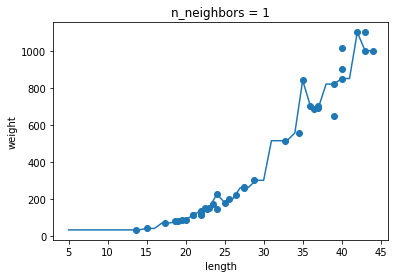

train score
0.9852830341215901
test score
0.991309195814175


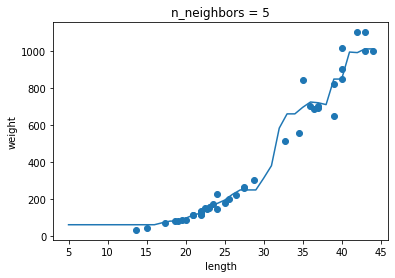

train score
0.9698823289099254
test score
0.992809406101064


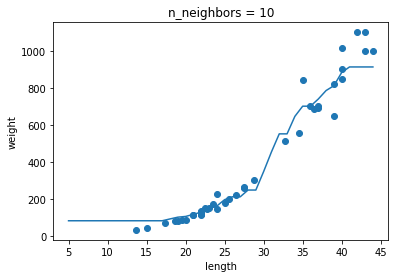

train score
0.96164569026043
test score
0.9737908255822255


In [46]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기 
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))    
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()
    print("train score")
    print(knr.score(train_input, train_target))
    print("test score")
    print(knr.score(test_input, test_target))